In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sys
import scipy
import sklearn
import random

from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [1]:
df = pd.read_csv("...../GlobalTemp.csv") 
country = pd.read_csv("....../GlobalLandTemperaturesByCountry.csv")
# read the dataset from Panda

NameError: name 'pd' is not defined

In [6]:
df.head(7) # We want to see check first few rows 

LandAverageTemperature  LandAverageTemperatureUncertainty  \
0                  10.942                             10.942   
1                  13.086                             13.086   
2                  14.155                             14.155   
3                  13.511                             13.511   
4                  11.895                             11.895   
5                   8.511                              8.511   
6                   5.660                              5.660   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0              16.728                          0.149               5.176   
1              18.954                          0.173               7.345   
2              19.852                          0.245               8.349   
3              19.163                          0.234               7.646   
4              17.740                          0.079               6.197   
5              14.028                          0.253               3.113   
6              11.156                          0.124               0.302   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                          0.108                          15.778   
1                          0.130                          16.448   
2                          0.221                          16.864   
3                          0.222                          16.671   
4                          0.100                          16.185   
5                          0.220                          15.167   
6                          0.164                          14.299   

   LandAndOceanAverageTemperatureUncertainty  CO2(ppm)  Date  
0                                      0.067   328.861  1976  
1                                      0.060   328.988  1976  
2                                      0.073   329.653  1976  
3                                      0.072   330.550  1976  
4                                      0.056   330.872  1976  
5                                      0.059   330.899  1976  
6                                      0.050   330.883  1976

In [220]:
df = df.drop('Date', 1)
df = df.drop('LandAverageTemperatureUncertainty', 1)
df = df.drop('LandMaxTemperatureUncertainty', 1)
df = df.drop('LandMinTemperatureUncertainty', 1)
df = df.drop('LandAndOceanAverageTemperatureUncertainty', 1)
print(df.describe())

       LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
count              476.000000          476.000000          476.000000   
mean                 9.237061           14.936958            3.627853   
std                  4.133016            4.246844            4.008844   
min                  2.492000            7.764000           -2.853000   
25%                  5.336500           10.999500           -0.276750   
50%                  9.436000           15.182500            3.762000   
75%                 13.217750           19.017000            7.500500   
max                 15.482000           21.320000            9.715000   

       LandAndOceanAverageTemperature    CO2(ppm)  
count                      476.000000  476.000000  
mean                        15.634269  361.264080  
std                          1.226482   19.446088  
min                         13.566000  328.861000  
25%                         14.443500  344.163500  
50%                         15

In [221]:
print(df.head(15))

    LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
0                   10.942              16.728               5.176   
1                   13.086              18.954               7.345   
2                   14.155              19.852               8.349   
3                   13.511              19.163               7.646   
4                   11.895              17.740               6.197   
5                    8.511              14.028               3.113   
6                    5.660              11.156               0.302   
7                    3.681               9.086              -1.708   
8                    2.492               7.764              -2.648   
9                    3.471               9.135              -2.152   
10                   5.702              11.581              -0.035   
11                   8.850              14.751               3.058   
12                  11.780              17.594               6.009   
13                  

In [222]:
#We want to check the dimensions of the data
print(df.shape)

(476, 5)


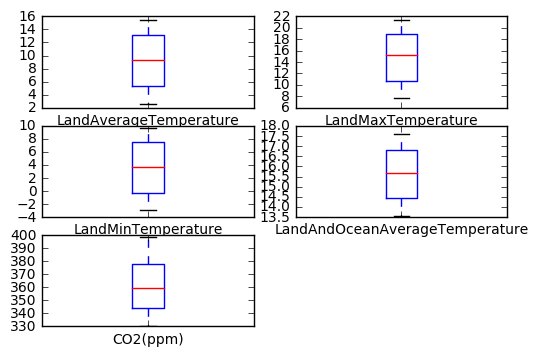

In [437]:
df.plot(kind='box', subplots=True, layout=(3,2))
plt.show()

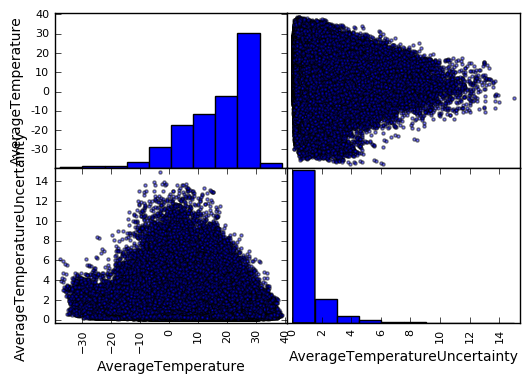

In [5]:
scatter_matrix(country)
plt.show()

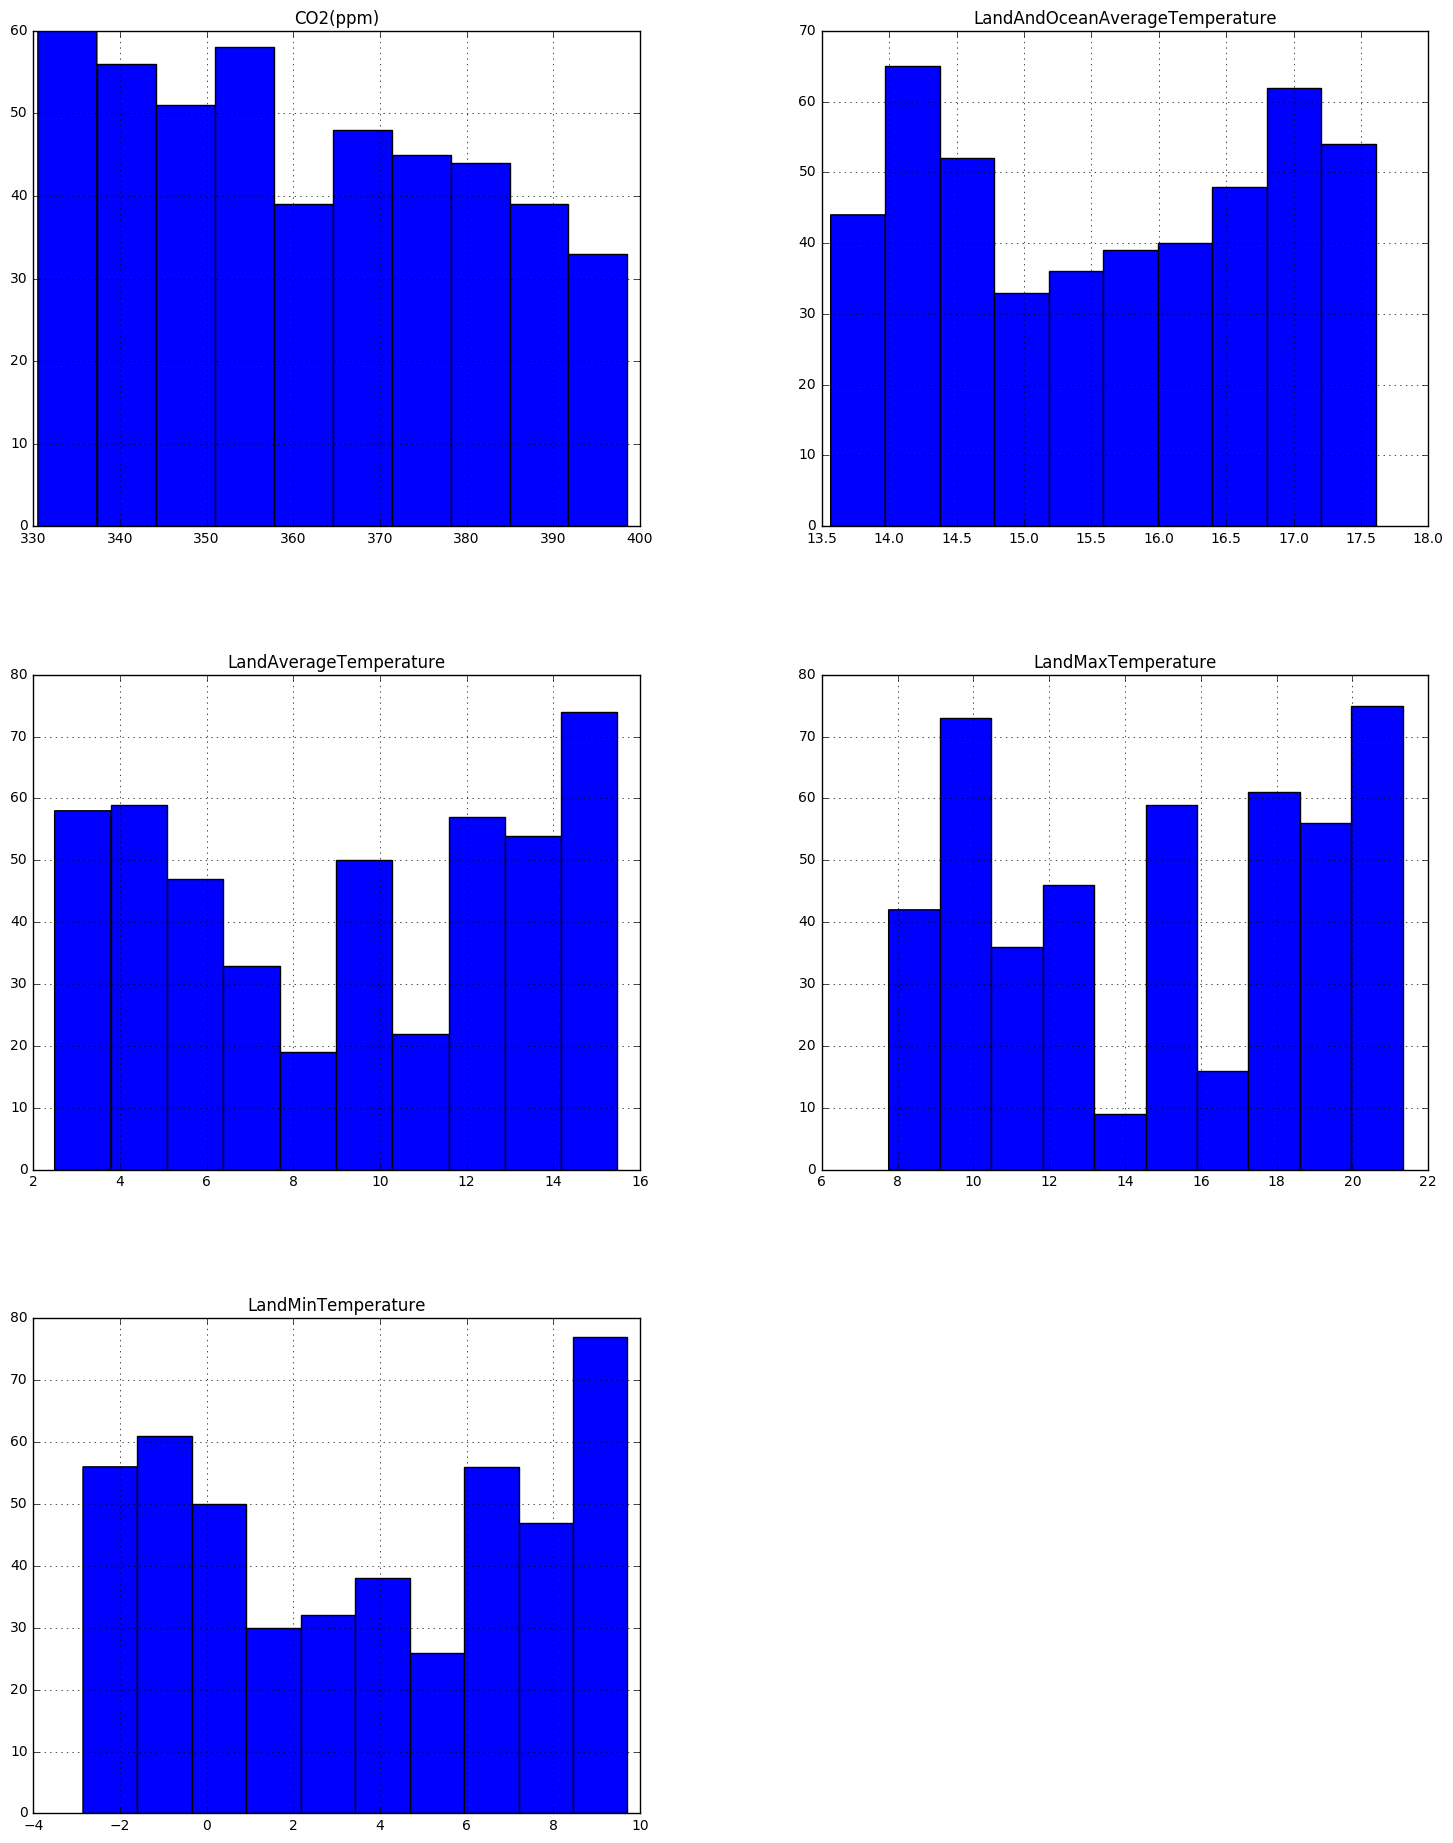

In [251]:
df.hist(figsize=(18,23))
plt.show()

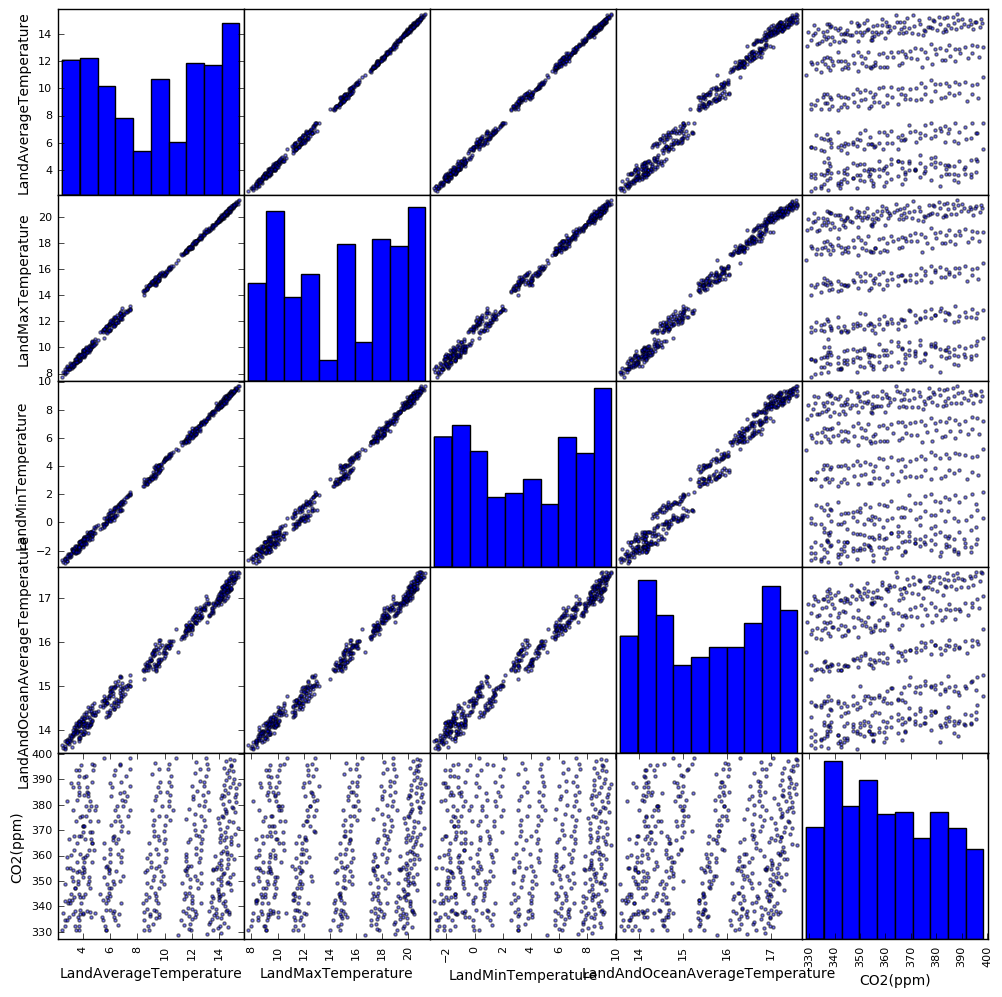

In [225]:
scatter_matrix(df,figsize=(12,12))
plt.show()

In [241]:
print (df.columns)
print(df.head(5))
print(print(df.tail(5)))

Index(['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature',
       'LandAndOceanAverageTemperature', 'CO2(ppm)'],
      dtype='object')
   LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
1                  13.086              18.954               7.345   
2                  14.155              19.852               8.349   
3                  13.511              19.163               7.646   
4                  11.895              17.740               6.197   
5                   8.511              14.028               3.113   

   LandAndOceanAverageTemperature  CO2(ppm)  
1                          16.448   328.988  
2                          16.864   329.653  
3                          16.671   330.550  
4                          16.185   330.872  
5                          15.167   330.899  
     LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
471                  14.755              20.699               9.005   
472           

In [246]:
df=df.iloc[1:,:]
print(df.head(3))

   LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
3                  13.511              19.163               7.646   
4                  11.895              17.740               6.197   
5                   8.511              14.028               3.113   

   LandAndOceanAverageTemperature  CO2(ppm)  
3                          16.671   330.550  
4                          16.185   330.872  
5                          15.167   330.899  


In [252]:
df.describe(percentiles=[.05,.25,.75,.95])

LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
count              473.000000          473.000000          473.000000   
mean                 9.214922           14.914288            3.606740   
std                  4.135350            4.249428            4.011353   
min                  2.492000            7.764000           -2.853000   
5%                   3.284400            8.713600           -2.076200   
25%                  5.245000           10.725000           -0.285000   
50%                  9.378000           15.170000            3.697000   
75%                 13.217000           19.006000            7.482000   
95%                 14.835400           20.652400            9.132600   
max                 15.482000           21.320000            9.715000   

       LandAndOceanAverageTemperature    CO2(ppm)  
count                      473.000000  473.000000  
mean                        15.629645  361.467653  
std                          1.228473   19.338140  
min                         13.566000  330.529000  
5%                          13.847600  333.682400  
25%                         14.436000  344.236000  
50%                         15.675000  359.442000  
75%                         16.786000  377.979000  
95%                         17.406000  393.869600  
max                         17.611000  398.572000

In [374]:
names = ['LandAverageTemperature','LandMaxTemperature','LandMinTemperature','CO2','Date']
df2= pd.read_csv(temp,names=names)
#had to use another method to verify information by deleting labels

In [375]:
print(df2.describe())

       LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
count              476.000000          476.000000          476.000000   
mean                14.936958            3.627853           15.634269   
std                  4.246844            4.008844            1.226482   
min                  7.764000           -2.853000           13.566000   
25%                 10.999500           -0.276750           14.443500   
50%                 15.182500            3.762000           15.699500   
75%                 19.017000            7.500500           16.787500   
max                 21.320000            9.715000           17.611000   

              CO2         Date  
count  476.000000   476.000000  
mean   361.264080  1995.663866  
std     19.446088    11.464014  
min    328.861000  1976.000000  
25%    344.163500  1986.000000  
50%    359.307500  1996.000000  
75%    377.939250  2006.000000  
max    398.572000  2015.000000  


In [380]:
array = df2.values
X = array[:,0:6]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [383]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 8
scoring = 'accuracy'

In [385]:
#use 4 different Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

#We use each method to confirrm an accuracy score for the data
results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.078947 (0.023538)
KNN: 0.294737 (0.070416)
CART: 0.984211 (0.021053)
SVM: 0.342105 (0.031137)


In [ ]:
#The results show that the KNN method is the largest score from estimating the accuracy using each method

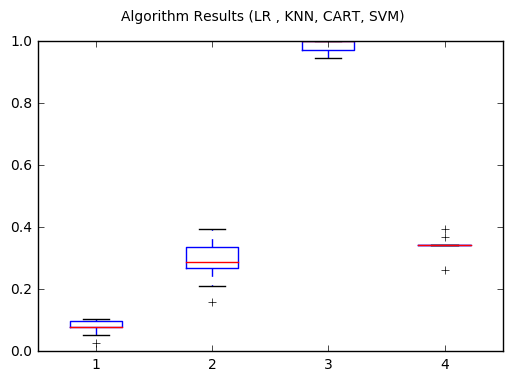

In [402]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Results (LR , KNN, CART, SVM)')
#ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [405]:
# Make predictions on validation dataset
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.979166666667
[[2 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 3 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 3]]
             precision    recall  f1-score   support

     1976.0       1.00      1.00      1.00         2
     1977.0       1.00      1.00      1.00         2
     1978.0       1.00      1.00      1.00         3
     1980.0       0.50      0.50      0.50         2
     1981.0       0.75      0.75      0.75         4
     1983.0       1.00      1.00      1.00         4
     1984.0       1.00      1.00      1.00         1
     1985.0       1.00      1.00      1.00         2
     1986.0       1.00      1.00      1.00         2
     1987.0       1.00      1.00      1.00         2
     1988.0       1.00      1.00      1.00         2
     1989.0       1.00      1.00      1.00         2
     1990.0       1.00      1.00      1.00         4
     1991.0       1.00      1.00      1.00         1
     1993.0       1.00      1.00      1.00         2
     199

In [412]:
# Make predictions on validation dataset
#knn = KNeighborsClassifier()
#knn.fit(X_train, Y_train)
#predictions = knn.predict(X_validation)
#print(accuracy_score(Y_validation, predictions))
#print(confusion_matrix(Y_validation, predictions))
#print(classification_report(Y_validation, predictions))

In [410]:
#from sklearn.decomposition import PCA
#pca=PCA(n_components=3)
#pca.fit(df)